# Sprint ディープラーニングフレームワーク2

## 1.このSprintについて
### Sprintの目的
フレームワークのコードを読めるようにする
フレームワークを習得し続けられるようになる
理論を知っている範囲をフレームワークで動かす

### どのように学ぶか
前半はTensorFlowのExampleを動かします。後半ではKerasのコードを書いていきます。

# 2.公式Example
深層学習フレームワークには公式に様々なモデルのExampleコードが公開されています。

## 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。


models/tutorials at master · tensorflow/models


##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 画像分類 Image classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: これらのドキュメントは私たちTensorFlowコミュニティが翻訳したものです。コミュニティによる 翻訳は**ベストエフォート**であるため、この翻訳が正確であることや[英語の公式ドキュメント](https://www.tensorflow.org/?hl=en)の 最新の状態を反映したものであることを保証することはできません。 この翻訳の品質を向上させるためのご意見をお持ちの方は、GitHubリポジトリ[tensorflow/docs](https://github.com/tensorflow/docs)にプルリクエストをお送りください。 コミュニティによる翻訳やレビューに参加していただける方は、 [docs-ja@tensorflow.org メーリングリスト](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ja)にご連絡ください。

このチュートリアルでは、画像から猫または犬を分類する方法を示します。 `tf.keras.Sequential` モデルを使用して画像分類器を構築し、 `tf.keras.preprocessing.image.ImageDataGenerator` を使用してデータをロードします。このチュートリアルでは、以下のコンセプトにしたがって、実践的な経験と感覚を養います。

* `tf.keras.preprocessing.image.ImageDataGenerator` クラスを使用して _データ入力パイプライン_ を構築し、モデルで使用するディスク上のデータを効率的に処理します。
* _過学習（Overfitting）_ —過学習を識別および防止する方法。
* _データ拡張（Data Augmentation）_ および _ドロップアウト（dropout）_ —データパイプラインおよび画像分類モデルに組み込むコンピュータービジョンタスクの過学習と戦うための重要なテクニック。

このチュートリアルは、基本的な機械学習のワークフローに従います。

1. データの調査及び理解
2. 入力パイプラインの構築
3. モデルの構築
4. モデルの学習
5. モデルのテスト
6. モデルの改善とプロセスの繰り返し

## パッケージのインポート

まずは必要なパッケージをインポートすることから始めましょう。 `os`パッケージはファイルとディレクトリ構造を読み込み、 NumPy は python リストの numpy 配列への変換と必要な行列演算の実行、 `matplotlib.pyplot` はグラフの描画や学習データおよび検証データに含まれる画像の表示、に利用します。

モデルの構築に必要な TensorFlow と Keras クラスをインポートします。

In [94]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## データの読み込み

データセットのダウンロードから始めます。このチュートリアルでは、 Kaggle の <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">Dogs vs Cats</a> データセットをフィルタリングしたバージョンを使用します。データセットのアーカイブバージョンをダウンロードし、"/tmp/"ディレクトリに保存します。

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

データセットのディレクトリ構造は次のとおりです:

<pre>
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

データの内容を抽出した後、学習および検証セットのための適切なファイルパスで変数を設定します。

In [5]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 検証用の犬画像のディレクトリ

### データの理解

学習および検証ディレクトリの中にある猫と犬の画像の数を見てみましょう:

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


便宜上、データセットの前処理およびネットワークの学習中に使用する変数を設定します。

In [9]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

## データの準備

モデルにデータを送る前に、画像を適切に前処理された浮動小数点テンソルにフォーマットします。

1.ディスクから画像を読み取ります。
2.これらの画像のコンテンツをデコードし、RGB値にしたがって適切なグリッド形式に変換します。
3.それらを浮動小数点テンソルに変換します。
4.ニューラルネットワークは小さな入力値を扱う方が適しているため、テンソルを0〜255の値から0〜1の値にリスケーリングします。

幸い、これらすべてのタスクは、 `tf.keras` によって提供される `ImageDataGenerator` クラスで実行できます。この `ImageDataGenerator` はディスクから画像を読み取り、適切なテンソルに前処理を行います。さらに、これらの画像をテンソルのバッチに変換するジェネレータをセットアップします。これは、ネットワーク学習時に便利です。

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ

学習および検証画像のジェネレータを定義したのち、 `flow_from_directory` メソッドはディスクから画像をロードし、リスケーリングを適用し、画像を必要な大きさにリサイズします。

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


### 学習用画像の可視化

学習用のジェネレータから画像バッチを抽出して可視化します。（この例では32個の画像を抽出し、そのうち5つを `matplotlib` で描画します。）

In [13]:
sample_training_images, _ = next(train_data_gen)

 `next` 関数はデータセットからバッチを返します。 `next` 関数の返り値は `（x_train、y_train）` の形式で、 `x_train` は学習用の特徴量、 `y_train` はそのラベルです。ラベルを破棄して、学習用画像の可視化のみを行います。

In [14]:
# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

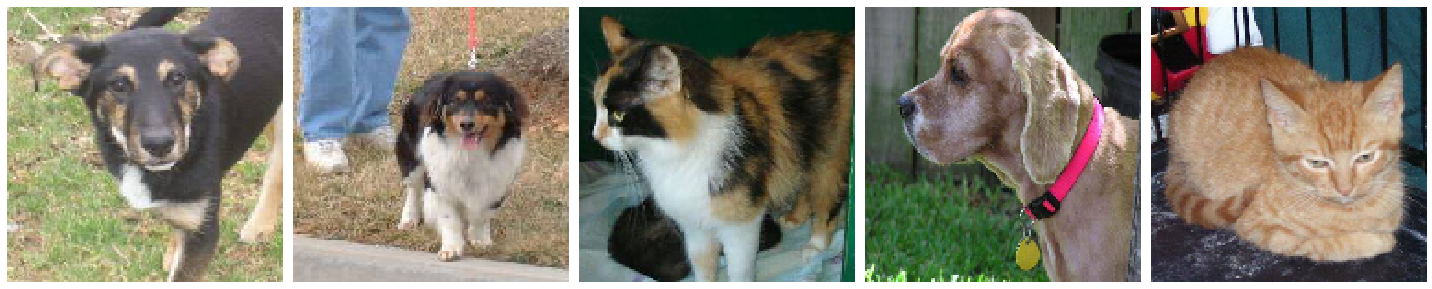

In [15]:
plotImages(sample_training_images[:5])

## モデルの構築

モデルはmax pooling層を伴う3つの畳み込みブロックからなります。さらに `relu` 活性化関数によるアクティベーションを伴う512ユニットの全結合層があります。モデルは、シグモイド活性化関数による2値分類に基づいてクラスに属する確率を出力します。

In [16]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


### モデルのコンパイル
このチュートリアルでは、 *ADAM* オプティマイザーと *binary cross entropy* 損失関数を選択します。各学習エポックの学習と検証の精度を表示するために、`metrics` 引数を渡します。

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### モデルの概要

すべてのネットワークのレイヤーを見るには、モデルの `summary` メソッドを利用します:

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
__________

### モデルの学習

`ImageDataGenerator` クラスの `fit_generator` メソッドを使用して、ネットワークを学習します。

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
16/16 [==============================] - 48s 3s/step - loss: 0.9098 - acc: 0.5075 - val_loss: 0.6906 - val_acc: 0.6110
Epoch 2/15
16/16 [==============================] - 46s 3s/step - loss: 0.6778 - acc: 0.5770 - val_loss: 0.6614 - val_acc: 0.6190
Epoch 3/15
16/16 [==============================] - 46s 3s/step - loss: 0.6490 - acc: 0.6185 - val_loss: 0.6169 - val_acc: 0.6870
Epoch 4/15
16/16 [==============================] - 46s 3s/step - loss: 0.5991 - acc: 0.6745 - val_loss: 0.5920 - val_acc: 0.6850
Epoch 5/15
16/16 [==============================] - 45s 3s/step - loss: 0.5409 - acc: 0.7365 - val_loss: 0.5790 - val_acc: 0.6990
Epoch 6/15
16/16 [==============================] - 46s 3s/step - loss: 0.4950 - acc: 0.7605 - val_loss: 0.5921 - val_acc: 0.6900
Epoch 7/15
16/16 [==============================] - 46s 3s/step - loss: 0.4187 - acc: 0.8070 - val_loss: 0.5841 - val_acc: 0.7130
Epoch 8/15
16/16 [========================

### 学習結果の可視化

ネットワークを学習した後、結果を可視化します。

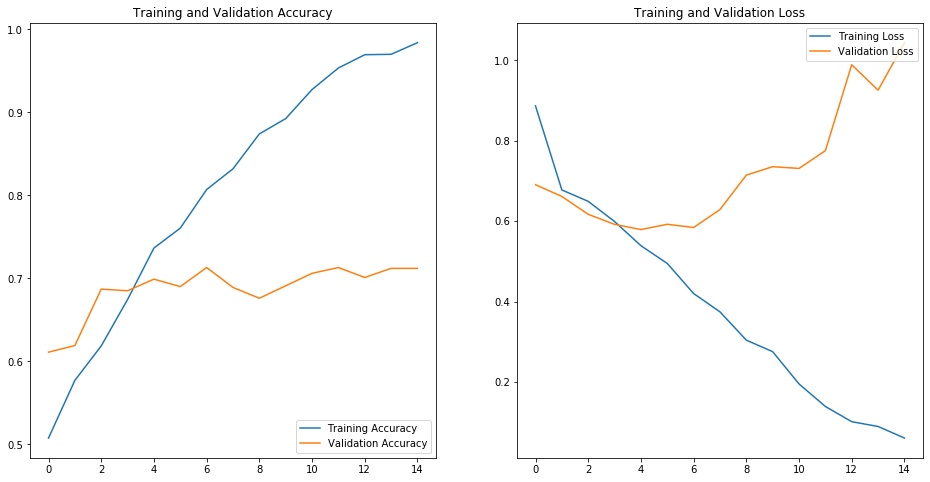

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

プロットからわかるように、学習セットの精度と検証セットの精度は大幅に外れており、モデルは検証セットで約70％の精度しか達成していません。

何がうまくいかなかったかを見て、モデル全体のパフォーマンスを向上してみましょう。

## 過学習

上記のプロットでは、学習セットの精度は時間とともに直線的に向上していますが、検証セットの精度は学習プロセスの中で約70％あたりで頭打ちになっています。そして、学習と検証の精度の違いが顕著です。これは *過学習* のサインです。

学習サンプルが少ない場合、モデルは学習サンプルに含まれるノイズや不要な詳細から学習してしまい、これによって新しいサンプルに対するモデルの性能に悪影響を与えることがあります。この現象は、過学習として知られています。過学習とは、モデルが新しいデータセットに対して汎化するのが難しい状態をいいます。

学習プロセスにおいて過学習に対抗する手段はいくつかあります。このチュートリアルでは、*データ拡張（data Augmentation）* を使用し、さらにモデルに *ドロップアウト（dropout）* を追加します。

## データ拡張（Data augmentation）

過学習は一般に、学習サンプルが少ない場合に発生します。この問題を解決する方法の1つは、十分な数の学習サンプルが含まれるようにデータセットを拡張することです。データ拡張は、既存の学習サンプルに対してランダムな変換を行い、データセットとして利用できそうな画像を生成するアプローチをとります。このデータ拡張の目的は、学習中にモデルがまったくおなじ画像を2回利用しないようにすることです。これによってモデルをデータのより多くの特徴を利用し、より汎化することができます。

`tf.keras` においては、このデータ拡張を `ImageDataGenerator` クラスを使用して実装します。データセットに対するさまざまな変換を指定することによって、学習プロセス中にそれが適用されます。

### データの拡張と可視化

最初に、ランダムな水平反転による拡張をデータセットに適用し、それぞれの画像が変換後にどのように見えるかを確認します。

### 水平反転の適用

 このデータ拡張を適用するためには、 `ImageDataGenerator` クラスの引数として `horizontal_flip` を渡し、 `True`を設定します。

In [26]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [27]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


学習サンプルから1つのサンプル画像を取得する作業を5回繰り返して、おなじ画像に5回データ拡張が適用されるようにします。

In [28]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

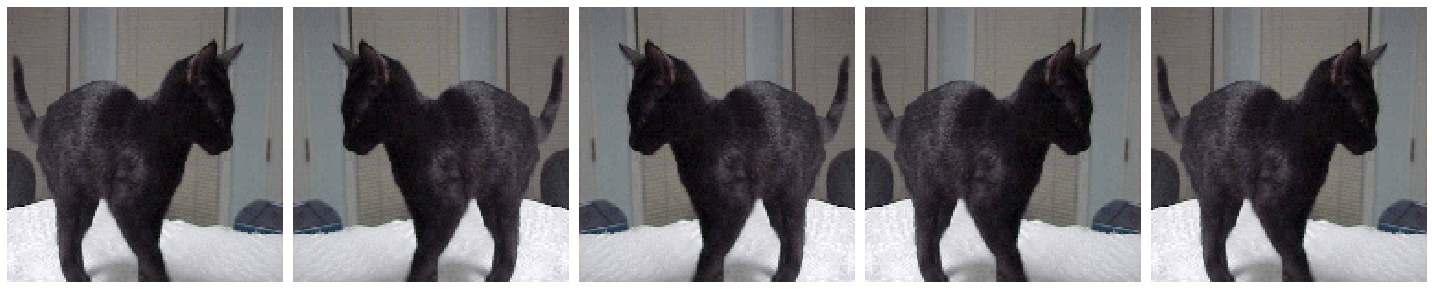

In [29]:
# 上で学習用画像の可視化のために定義、使用されたおなじカスタムプロット関数を再利用する
plotImages(augmented_images)

### 画像のランダムな回転

回転のデータ拡張を利用して学習用サンプルをランダムに左右45度の範囲で回転させてみましょう。

In [30]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [31]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


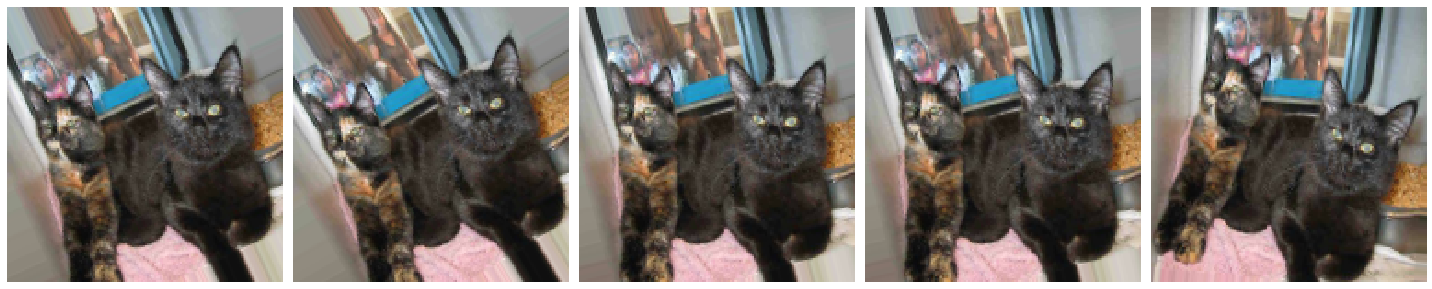

In [32]:
plotImages(augmented_images)

### ズームによるデータ拡張の適用

データセットにズームによるデータ拡張を適用して、画像をランダムに最大50％拡大します。

In [33]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [34]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


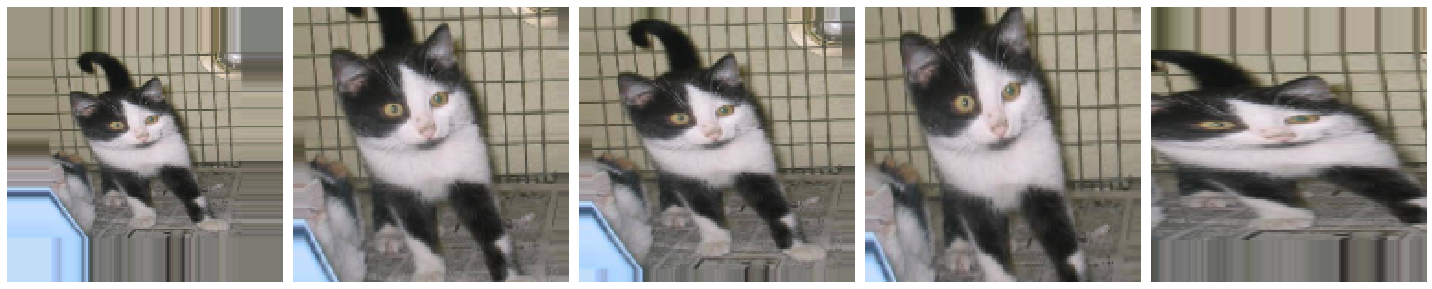

In [35]:
plotImages(augmented_images)

### すべてのデータ拡張を同時に利用する

ここまでで紹介したすべてのデータ拡張機能を適用します。ここでは、学習用画像に対して、リスケール、45度の回転、幅シフト、高さシフト、水平反転、ズームを適用しました。

In [36]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [37]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


これらのデータ拡張がデータセットにランダムに適用されたときに、一つの画像に対して5回の個別の適用を行った際にそれぞれどのように見えるかを可視化します。

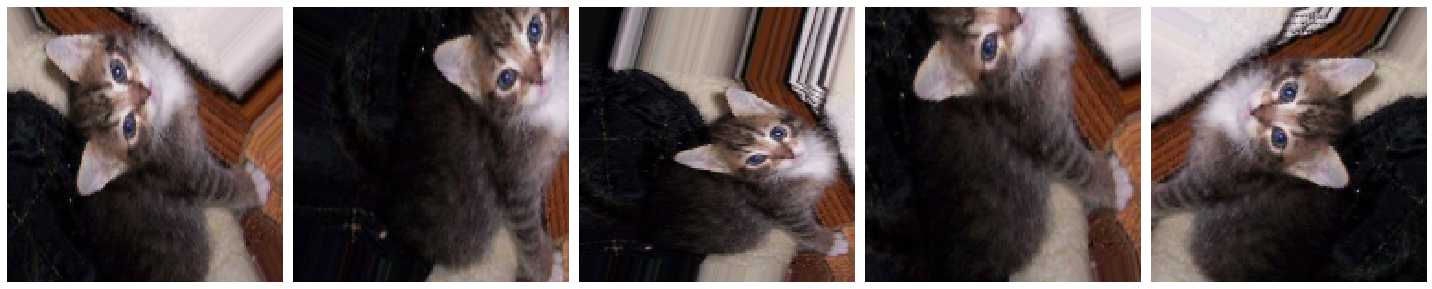

In [38]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### 検証データジェネレータの構築

一般に、データ拡張は学習サンプルのみに適用します。今回は、 `ImageDataGenerator` を使用して検証画像に対してリスケールのみを実施し、バッチに変換します。

In [39]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [40]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## ドロップアウト（dropout）

過学習を避けるもう一つの方法は、ネットワークに *ドロップアウト* を導入することです。これは、ネットワークにおいて重みを小さくする正則化の方式で、これによって重みの値の分布がより規則的になり、少ない学習データに対する過学習を減らすことができます。ドロップアウトはこのチュートリアルで利用される正則化手法の一つです。

ドロップアウトをレイヤーに適用すると、学習プロセス中に適用されたレイヤーのうちランダムに出力ユニットをドロップアウト（ゼロに設定）します。ドロップアウトは、入力値として0.1、0.2、0.4といった形式の小数をとります。これは、適用されたレイヤーからランダムに出力単位の10％、20％、または40％をドロップアウトすることを意味します。

特定のレイヤーに0.1ドロップアウトを適用すると、各学習エポックにおいて出力ユニットの10％がランダムに0にされます。

この新しいドロップアウト機能を使用したネットワークアーキテクチャを作成し、異なる畳み込みレイヤーや全接続レイヤーに適用してみましょう。

## ドロップアウトを追加した新しいネットワークの構築

ここでは、ドロップアウトを最初と最後の max pool 層に適用します。ドロップアウトを適用すると、各学習エポック中にニューロンの20％がランダムにゼロに設定されます。これにより、学習データセットに対する過学習を避けることができます。

In [41]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### モデルのコンパイル

ネットワークにドロップアウトを導入した後、モデルをコンパイルし、レイヤーの概要を表示します。

In [42]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
__________

### モデルの学習

学習サンプルにデータ拡張を導入し、ネットワークにドロップアウトを追加した後、この新しいネットワークを学習します:

In [43]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
16/16 [==============================] - 54s 3s/step - loss: 1.1337 - acc: 0.5215 - val_loss: 0.6929 - val_acc: 0.5200
Epoch 2/15
16/16 [==============================] - 49s 3s/step - loss: 0.6926 - acc: 0.5040 - val_loss: 0.6910 - val_acc: 0.5000
Epoch 3/15
16/16 [==============================] - 49s 3s/step - loss: 0.6917 - acc: 0.5225 - val_loss: 0.6875 - val_acc: 0.5000
Epoch 4/15
16/16 [==============================] - 50s 3s/step - loss: 0.6839 - acc: 0.5360 - val_loss: 0.6705 - val_acc: 0.5210
Epoch 5/15
16/16 [==============================] - 50s 3s/step - loss: 0.6686 - acc: 0.5800 - val_loss: 0.6471 - val_acc: 0.5810
Epoch 6/15
16/16 [==============================] - 50s 3s/step - loss: 0.6561 - acc: 0.5855 - val_loss: 0.6252 - val_acc: 0.6370
Epoch 7/15
16/16 [==============================] - 50s 3s/step - loss: 0.6584 - acc: 0.5960 - val_loss: 0.6404 - val_acc: 0.6220
Epoch 8/15
16/16 [==============================] - 52s 3s/step - loss: 0.6526 - acc: 0.61

### モデルの可視化

学習後に新しいモデルを可視化すると、過学習が前回よりも大幅に少ないことがわかります。より多くのエポックでモデルを学習すると、精度はさらに向上するはずです。

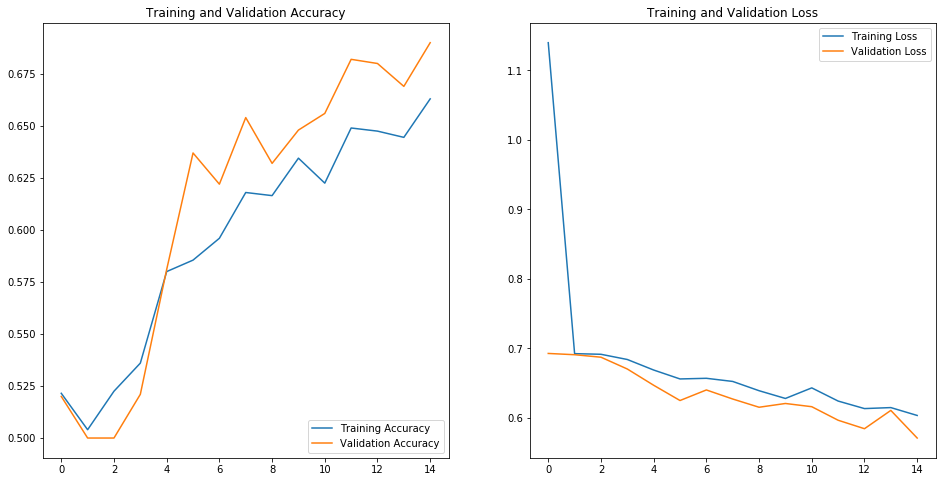

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

epoch数を倍にしてみる。

In [46]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs * 2,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/30
16/16 [==============================] - 57s 4s/step - loss: 0.5959 - acc: 0.6825 - val_loss: 0.5823 - val_acc: 0.6750
Epoch 2/30
16/16 [==============================] - 55s 3s/step - loss: 0.5988 - acc: 0.6620 - val_loss: 0.5876 - val_acc: 0.6750
Epoch 3/30
16/16 [==============================] - 56s 3s/step - loss: 0.5900 - acc: 0.6805 - val_loss: 0.5644 - val_acc: 0.6890
Epoch 4/30
16/16 [==============================] - 55s 3s/step - loss: 0.5785 - acc: 0.6865 - val_loss: 0.5571 - val_acc: 0.7140
Epoch 5/30
16/16 [==============================] - 56s 3s/step - loss: 0.6157 - acc: 0.6500 - val_loss: 0.5738 - val_acc: 0.6970
Epoch 6/30
16/16 [==============================] - 60s 4s/step - loss: 0.5907 - acc: 0.6910 - val_loss: 0.5670 - val_acc: 0.7050
Epoch 7/30
16/16 [==============================] - 63s 4s/step - loss: 0.5783 - acc: 0.6995 - val_loss: 0.5448 - val_acc: 0.7190
Epoch 8/30
16/16 [==============================] - 59s 4s/step - loss: 0.5612 - acc: 0.70

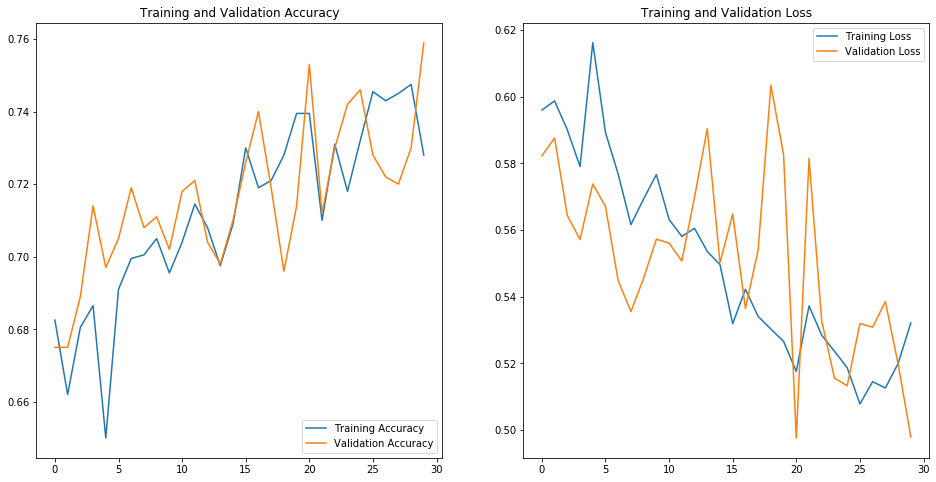

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs * 2)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 波形がガタついているが、過学習傾向はみられなくなった。

## 【問題2】（アドバンス課題）様々な手法を実行
TensorFLowやGoogle AI ResearchのGitHubリポジトリには、定番のモデルから最新のモデルまで多様なコードが公開されています。これらから興味あるものを選び実行してください。


なお、これらのコードは初学者向けではないため、巨大なデータセットのダウンロードが必要な場合など、実行が簡単ではないこともあります。そういった場合は、コードリーディングを行ってください。


models/research at master · tensorflow/models


google-research/google-research: Google AI Research


更新日が古いものはPythonやTensorFlowのバージョンが古く、扱いずらい場合があります。新しいものから見ることを推奨します。

## Skip

# 3.異なるフレームワークへの書き換え

「ディープラーニングフレームワーク1」で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していきます。


・Iris（Iris-versicolorとIris-virginicaのみの2値分類）  
・Iris（3種類全ての目的変数を使用して多値分類）  
・House Prices  
・MNIST  

## Kerasへの書き換え
KerasはTensorFLowに含まれるtf.kerasモジュールを使用してください。


KerasにはSequentialモデルかFunctional APIかなど書き方に種類がありますが、これは指定しません。

## 【問題3】Iris（2値分類）をKerasで学習

In [2]:
import tensorflow as tf

print(tf.VERSION)  # tf.__version__でもよい

1.13.1


In [19]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

tf.keras.backend.clear_session()

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 20    # ★★　←epochs = 10 ⇒ 20 に変更
n_hidden1 = 50
n_hidden2 = 100
n_classes = 1
n_input = X_train.shape[1]
n_samples = X_train.shape[0]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(n_classes, activation = tf.nn.sigmoid))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data =(X_val, y_val))

y_pred_proba = model.predict(X_test)[:, 0]
# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________
Train on 64 samples, validate on 16 samples
Epoch 1/20
64/64 [==============================] - 0s 3ms/sample - loss: 0.8946 - acc: 0.5000 - val_loss: 0.6074 - val_acc: 0.9375
Epoch 2/20
64/64 [==============================] - 0s 203us/sample - loss: 0.5834 - acc: 0.8281 - val_loss: 0.5733 - val_acc: 0.7500
Epoch 3/20
64/64 [==============================] - 0s 296us/sample - loss: 0.5141 - acc: 0.73

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.35942962765693665
Test accuracy: 0.9


Text(0, 0.5, 'Loss')

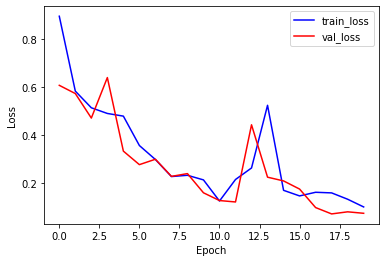

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
        
plt.plot(range(len(loss)), loss, color = "blue", label = "train_loss")
plt.plot(range(len(val_loss)), val_loss, color = "red", label = "val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'acc')

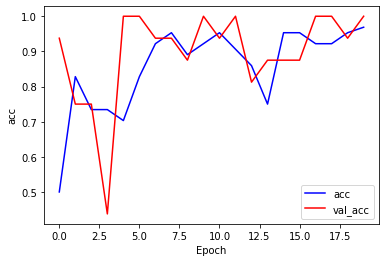

In [22]:
plt.plot(range(len(acc)), acc, color = "blue", label = "acc")
plt.plot(range(len(val_acc)), val_acc, color = "red", label = "val_acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("acc")

## 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [39]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder 

tf.keras.backend.clear_session()

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int)[:, np.newaxis]

# one-hot-vectol化
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
#y_train_one_hot = enc.fit_transform(y[:, np.newaxis])
y_train_one_hot = enc.fit_transform(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y_train_one_hot, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("y_train.shape = ", y_train.shape)
print("y_val.shape = ", y_val.shape)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 20    # ★★　←epochs = 10 ⇒ 20 に変更
n_hidden1 = 50
n_hidden2 = 100
n_classes = 3
n_input = X_train.shape[1]
n_samples = X_train.shape[0]

model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu, input_shape=(4,)))
model4.add(tf.keras.layers.Dense(n_hidden2, activation = tf.nn.relu))
model4.add(tf.keras.layers.Dense(n_classes, activation = tf.nn.softmax))

model4.summary()

model4.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

history4 = model4.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data =(X_val, y_val))

y_pred_proba = model4.predict(X_test)[:, 0]
# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)


y_train.shape =  (96, 3)
y_val.shape =  (24, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________
Train on 96 samples, validate on 24 samples
Epoch 1/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.8718 - acc: 0.6146 - val_loss: 0.5849 - val_acc: 0.7083
Epoch 2/20
96/96 [==============================] - 0s 156us/sample - loss: 0.4325 - acc: 0.7917 - val_loss: 0.3672 - val_acc: 0.8333
Epoch 3/20
96/96 [============================

In [36]:
score = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05541357025504112
Test accuracy: 0.96666664


Text(0, 0.5, 'Loss')

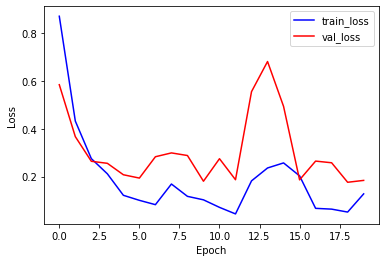

In [40]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
        
plt.plot(range(len(loss)), loss, color = "blue", label = "train_loss")
plt.plot(range(len(val_loss)), val_loss, color = "red", label = "val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'acc')

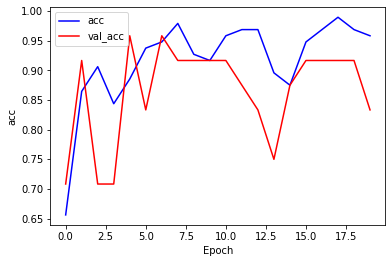

In [38]:
plt.plot(range(len(acc)), acc, color = "blue", label = "acc")
plt.plot(range(len(val_acc)), val_acc, color = "red", label = "val_acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("acc")

## 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [53]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder 

tf.keras.backend.clear_session()

# データセットの読み込み
dataset_path ="HousePrice_train.csv"
df = pd.read_csv(dataset_path)

df_data = df.loc[:,["GrLivArea","YearBuilt","SalePrice"]]

# 欠損値があるサンプル（行）は削除する。
drop_df = df_data.dropna(axis=0)


# ndarrayへ変換
X = np.array(drop_df.iloc[:,0:2])
y = np.array(drop_df.iloc[:,2]).reshape(-1,1)



# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X_train.shape = ", X_train.shape)
print("y_train.shape = ", y_train.shape)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 30
n_hidden1 = 100
n_hidden2 = 50
n_output = 1
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
print("n_input = ", n_input)

model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu, input_shape=(2,) ) )
model5.add(tf.keras.layers.Dense(n_hidden2, activation = tf.nn.relu))
model5.add(tf.keras.layers.Dense(n_output, activation = tf.nn.relu))

model5.summary()

model5.compile(loss='mean_squared_error',
              optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate))

history5 = model5.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data =(X_val, y_val))

y_pred = model5.predict(X_test)[:, 0]

print("y_pred", y_pred)


X_train.shape =  (934, 2)
y_train.shape =  (934, 1)
n_input =  2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________
Train on 934 samples, validate on 234 samples
Epoch 1/30
934/934 [==============================] - 0s 302us/sample - loss: 10480942481.5418 - val_loss: 3051034742.1538
Epoch 2/30
934/934 [==============================] - 0s 100us/sample - loss: 3581652449.6445 - val_loss: 2543979413.0598
Epoch 3/30
934/934 [============================

In [56]:
score = model5.evaluate(X_test, y_test, verbose=0)
print(score)
print('Test loss:', score)

3912099208.767123
Test loss: 3912099208.767123


Text(0, 0.5, 'Loss')

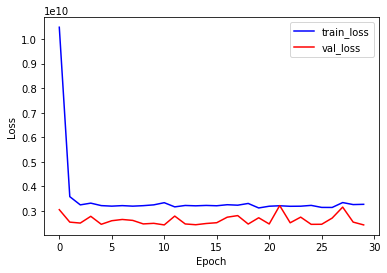

In [59]:
loss = history5.history['loss']
val_loss = history5.history['val_loss']
        
plt.plot(range(len(loss)), loss, color = "blue", label = "train_loss")
plt.plot(range(len(val_loss)), val_loss, color = "red", label = "val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

## 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [65]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder 
from keras.datasets import mnist

tf.keras.backend.clear_session()

# データセットの読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one-hot-vectol化
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.fit_transform(y_test[:, np.newaxis])

X_train = X_train /255
X_test = X_test /255

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("y_train.shape = ", y_train.shape)
print("y_val.shape = ", y_val.shape)

# ハイパーパラメータの設定
learning_rate = 0.0008
batch_size = 20
num_epochs = 10
n_hidden1 = 400
n_hidden2 = 200
n_classes = 10
n_input = X_train.shape[1]
n_samples = X_train.shape[0]

model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu, input_shape=(784,)))
model6.add(tf.keras.layers.Dense(n_hidden2, activation = tf.nn.relu))
model6.add(tf.keras.layers.Dense(n_classes, activation = tf.nn.softmax))

model6.summary()

model6.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate),
              metrics=['accuracy'])

history6 = model6.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data =(X_val, y_val))

y_pred_proba = model6.predict(X_test)[:, 0]
# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_train.shape =  (48000, 10)
y_val.shape =  (12000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 202us/sample - loss: 0.2120 - acc: 0.9361 - val_loss: 0.1081 - val_acc: 0.9657
Epoch 2/10
48000/48000 [==============================] - 10s 207us/sample - loss: 0.0868 - acc: 0.9731 - val_loss: 0.0979 - val_acc: 0.9704
Epoch 3/10
4

In [66]:
score = model6.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12303578369052412
Test accuracy: 0.975


Text(0, 0.5, 'Loss')

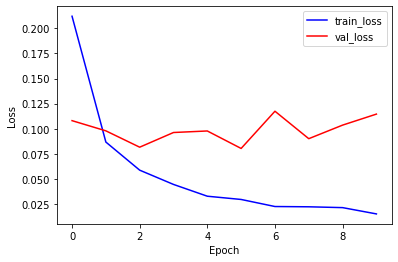

In [67]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
        
plt.plot(range(len(loss)), loss, color = "blue", label = "train_loss")
plt.plot(range(len(val_loss)), val_loss, color = "red", label = "val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'acc')

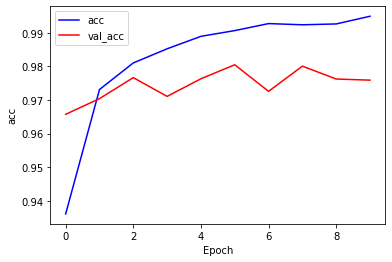

In [68]:
plt.plot(range(len(acc)), acc, color = "blue", label = "acc")
plt.plot(range(len(val_acc)), val_acc, color = "red", label = "val_acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("acc")

## 【問題7】（アドバンス課題）PyTorchへの書き換え
4種類の問題をPyTorchに書き換えてください。

### ＜Iris（Iris-versicolorとIris-virginicaのみの2値分類）＞

In [194]:
import torch
from torch import nn

In [446]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 20
num_epochs = 200
n_input = 4
n_hidden1 = 100
n_hidden2 = 50
n_output = 1
n_samples = X_train.shape[0]


net = nn.Sequential(
    nn.Linear(n_input, n_hidden1),
    nn.ReLU(),
    nn.Linear(n_hidden1, n_hidden2),
    nn.ReLU(),
    nn.Linear(n_hidden2, n_output),
    nn.Sigmoid()
)


'\nnet = nn.Sequential(\n    nn.Linear(n_input, n_output),\n    nn.Sigmoid()\n)\n'

In [538]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)



In [539]:
from torch.utils.data import TensorDataset, DataLoader

# NumPyのndarrayをPyTorchのTensorに変換
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32) 
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32) 

# 訓練用データでDataLoaderを作成
ds_train = TensorDataset(X_train, y_train)
train_loader = DataLoader(ds_train, batch_size=batch_size, shuffle=True)

In [449]:
from torch import optim
from sklearn.metrics import accuracy_score

# ソフトマックスクロスエントロピー
loss_fn = nn.BCEWithLogitsLoss()

# Adam
optimizer = optim.Adam(net.parameters())

# 損失関数のログ
losses = []

train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(num_epochs):
    running_loss = 0.0
    train_accuracy = 0
    v_acc = 0
    acc = 0
    # ネットワークを訓練モードにする
    net.train()
    for i, (xx, yy) in enumerate(train_loader):
        optimizer.zero_grad()        
        y_pred = net(xx)

        # 0.5を閾値として０～１を分類
        _y_pred = torch.where(y_pred >= 0.5, torch.tensor(1), torch.tensor(0))

        loss = loss_fn(y_pred, yy)

        loss.backward()
        correct = ((_y_pred == yy).sum().item() / len(yy))
        acc += correct

        optimizer.step()
        running_loss += loss.item()
        
  
    train_losses.append(running_loss / (i+1))
    train_acc.append(acc / (i+1) )
    
    # ネットワークを評価モードにして
    # 検証データの損失関数を計算する
    net.eval()
    y_pred = net(X_val)
    val_loss = loss_fn(y_pred, y_val)
    val_losses.append(val_loss.item())

    _y_pred = torch.where(y_pred >= 0.5, torch.tensor(1), torch.tensor(0))
    v_acc += (_y_pred == y_val).sum().item()/len(y_val)
    val_acc.append(v_acc)
    
    print("Epoch {}, train_losses : {:.4f}, val_losses : {:.4f}, acc : {:.4f}, val_acc : {:.4f}".format(
        epoch + 1, train_losses[-1], val_losses[-1], train_acc[-1], val_acc[-1]))
   

Epoch 1, train_losses : 0.7208, val_losses : 0.7084, acc : 0.4625, val_acc : 0.5000
Epoch 2, train_losses : 0.7097, val_losses : 0.7009, acc : 0.5000, val_acc : 0.5000
Epoch 3, train_losses : 0.7035, val_losses : 0.6979, acc : 0.5000, val_acc : 0.5000
Epoch 4, train_losses : 0.6998, val_losses : 0.6960, acc : 0.5000, val_acc : 0.5000
Epoch 5, train_losses : 0.6978, val_losses : 0.6949, acc : 0.5000, val_acc : 0.5000
Epoch 6, train_losses : 0.6972, val_losses : 0.6939, acc : 0.5000, val_acc : 0.5000
Epoch 7, train_losses : 0.6955, val_losses : 0.6928, acc : 0.5000, val_acc : 0.5000
Epoch 8, train_losses : 0.6943, val_losses : 0.6917, acc : 0.5000, val_acc : 0.5000
Epoch 9, train_losses : 0.6933, val_losses : 0.6906, acc : 0.5000, val_acc : 0.5000
Epoch 10, train_losses : 0.6920, val_losses : 0.6893, acc : 0.5000, val_acc : 0.5000
Epoch 11, train_losses : 0.6905, val_losses : 0.6872, acc : 0.5000, val_acc : 0.5000
Epoch 12, train_losses : 0.6900, val_losses : 0.6839, acc : 0.5000, val_ac

Text(0, 0.5, 'Loss')

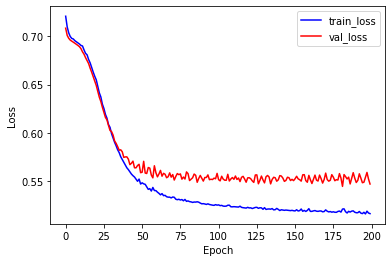

In [450]:
plt.plot(range(len(train_losses)), train_losses, color = "blue", label = "train_loss")
plt.plot(range(len(val_losses)), val_losses, color = "red", label = "val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'acc')

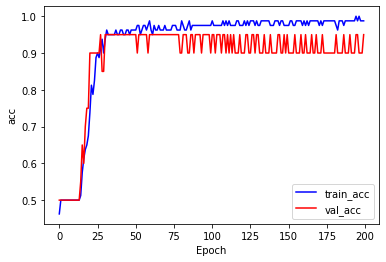

In [451]:
plt.plot(range(len(train_acc)), train_acc, color = "blue", label = "train_acc")
plt.plot(range(len(val_acc)), val_acc, color = "red", label = "val_acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("acc")

### ＜Iris（多クラス分類）＞

In [648]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 20
num_epochs = 200
n_input = 4
n_hidden1 = 100
n_hidden2 = 50
n_output = 3
n_samples = X_train.shape[0]


net = nn.Sequential(
    nn.Linear(n_input, n_hidden1),
    nn.ReLU(),
    nn.Linear(n_hidden1, n_hidden2),
    nn.ReLU(),
    nn.Linear(n_hidden2, n_output),
    nn.Softmax()
)


In [649]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
X = np.array(X)
y = np.array(y)


# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int)[:, np.newaxis]

# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train.shape = ", X_train.shape)
print("X_val.shape = ", X_val.shape)
print("y_train.shape = ", y_train.shape)
print("y_val.shape = ", y_val.shape)

print("type(X_train) = ", type(X_train))
print("type(y_train) = ", type(y_train))

X_train.shape =  (120, 4)
X_val.shape =  (30, 4)
y_train.shape =  (120, 1)
y_val.shape =  (30, 1)
type(X_train) =  <class 'numpy.ndarray'>
type(y_train) =  <class 'numpy.ndarray'>


In [650]:
from torch.utils.data import TensorDataset, DataLoader

# NumPyのndarrayをPyTorchのTensorに変換
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)


# 訓練用データでDataLoaderを作成
ds_train = TensorDataset(X_train, y_train)
train_loader = DataLoader(ds_train, batch_size=batch_size, shuffle=True)

In [651]:
from torch import optim
from sklearn.metrics import accuracy_score

# ソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()

# Adam
optimizer = optim.Adam(net.parameters())

# 損失関数のログ
losses = []

train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(num_epochs):
    running_loss = 0.0
    train_accuracy = 0
    acc = 0    
    v_acc = 0

    # ネットワークを訓練モードにする
    net.train()
    for i, (xx, yy) in enumerate(train_loader):
        optimizer.zero_grad()        
        y_pred = net(xx)

        # y_predはn×3の2次元
        _y_pred = torch.argmax(y_pred, dim = 1)
        
        # ｙは要素数ｎの1次元配列へ
        _yy = torch.flatten(yy, start_dim = 0)
        

        loss = loss_fn(y_pred, _yy)

        loss.backward()
        correct = ((_y_pred == _yy).sum().item() / len(yy))
        acc += correct

        optimizer.step()
        running_loss += loss.item()
        
    train_losses.append(running_loss / (i+1))
    train_acc.append(acc / (i+1) )
    
    # ネットワークを評価モードにして
    # 検証データの損失関数を計算する
    net.eval()
    with torch.no_grad():
        y_pred = net(X_val)
    _y_val = torch.flatten(y_val, start_dim = 0)
    val_loss = loss_fn(y_pred, _y_val)
    val_losses.append(val_loss.item())

    # y_predはn×3の2次元 ⇒ ｎ×１次元
    _y_pred = torch.argmax(y_pred, dim = 1)
    
    v_acc = ((_y_pred == _y_val).float().sum().item() / len(y_val))
    
    val_acc.append(v_acc)
    
    if (epoch + 1)%10 ==0:
        print("Epoch {}, train_losses : {:.4f}, val_losses : {:.4f}, acc : {:.4f}, val_acc : {:.4f}".format(
            epoch + 1, train_losses[-1], val_losses[-1], val_loss, v_acc))

    

Epoch 10, train_losses : 0.8333, val_losses : 0.8892, acc : 0.8892, val_acc : 0.5667
Epoch 20, train_losses : 0.7036, val_losses : 0.7106, acc : 0.7106, val_acc : 0.9333
Epoch 30, train_losses : 0.6408, val_losses : 0.6432, acc : 0.6432, val_acc : 1.0000
Epoch 40, train_losses : 0.6179, val_losses : 0.5892, acc : 0.5892, val_acc : 1.0000
Epoch 50, train_losses : 0.6026, val_losses : 0.5819, acc : 0.5819, val_acc : 1.0000
Epoch 60, train_losses : 0.5988, val_losses : 0.5755, acc : 0.5755, val_acc : 1.0000
Epoch 70, train_losses : 0.5940, val_losses : 0.5773, acc : 0.5773, val_acc : 1.0000
Epoch 80, train_losses : 0.5885, val_losses : 0.5674, acc : 0.5674, val_acc : 1.0000
Epoch 90, train_losses : 0.5914, val_losses : 0.5701, acc : 0.5701, val_acc : 1.0000
Epoch 100, train_losses : 0.5859, val_losses : 0.5639, acc : 0.5639, val_acc : 1.0000
Epoch 110, train_losses : 0.5848, val_losses : 0.5632, acc : 0.5632, val_acc : 1.0000
Epoch 120, train_losses : 0.5821, val_losses : 0.5616, acc : 0.

Text(0, 0.5, 'Loss')

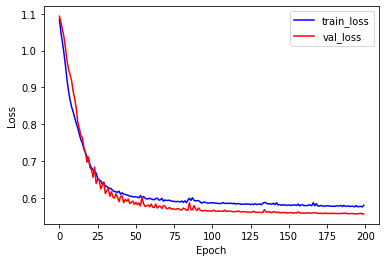

In [652]:
	plt.plot(range(len(train_losses)), train_losses, color = "blue", label = "train_loss")
	plt.plot(range(len(val_losses)), val_losses, color = "red", label = "val_loss")
	plt.legend()
	plt.xlabel("Epoch")
	plt.ylabel("Loss")

Text(0, 0.5, 'acc')

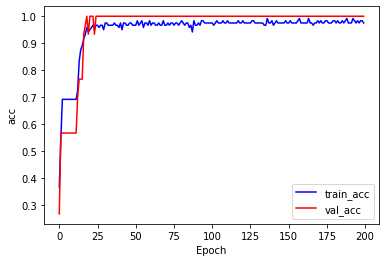

In [653]:
	plt.plot(range(len(train_acc)), train_acc, color = "blue", label = "train_acc")
	plt.plot(range(len(val_acc)), val_acc, color = "red", label = "val_acc")
	plt.legend()
	plt.xlabel("Epoch")
	plt.ylabel("acc")


### ＜House Prices＞

In [739]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 20
num_epochs = 50
n_input = 2
n_hidden1 = 100
n_hidden2 = 50
n_output = 1
n_samples = X_train.shape[0]

net = nn.Sequential(
    nn.Linear(n_input, n_hidden1),
    nn.ReLU(),
    nn.Linear(n_hidden1, n_hidden2),
    nn.ReLU(),
    nn.Linear(n_hidden2, n_output),
)


In [740]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder 

tf.keras.backend.clear_session()

# データセットの読み込み
dataset_path ="HousePrice_train.csv"
df = pd.read_csv(dataset_path)

df_data = df.loc[:,["GrLivArea","YearBuilt","SalePrice"]]

# ndarrayへ変換
X = np.array(df_data.iloc[:,0:2])
y = np.array(df_data.iloc[:,2]).reshape(-1,1)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [741]:
from torch.utils.data import TensorDataset, DataLoader

# NumPyのndarrayをPyTorchのTensorに変換
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# 訓練用データでDataLoaderを作成
ds_train = TensorDataset(X_train, y_train)
train_loader = DataLoader(ds_train, batch_size=batch_size, shuffle=True)

In [742]:
from torch import optim
from sklearn.metrics import accuracy_score

# ソフトマックスクロスエントロピー
loss_fn = nn.MSELoss()

# Adam
optimizer = optim.Adam(net.parameters())

# 損失関数のログ
losses = []

train_losses = []
val_losses = []
rmse_loss = []
val_rmse_loss = []

for epoch in range(num_epochs):
    running_loss = 0.0
    train_accuracy = 0
    acc = 0    
    v_acc = 0

    # ネットワークを訓練モードにする
    net.train()
    for i, (xx, yy) in enumerate(train_loader):
        optimizer.zero_grad()        
        y_pred = net(xx)

        loss = loss_fn(y_pred, yy)

        loss.backward()

        optimizer.step()
        running_loss += loss.item()
        
    train_losses.append(running_loss / (i+1))
    rmse_loss.append(np.sqrt(train_losses[-1]))
    
    # ネットワークを評価モードにして
    # 検証データの損失関数を計算する
    net.eval()
    with torch.no_grad():
        y_pred = net(X_val)
    _y_val = torch.flatten(y_val, start_dim = 0)
    val_loss = loss_fn(y_pred, _y_val)
    val_losses.append(val_loss.item())
    val_rmse_loss.append(np.sqrt(val_losses[-1]))

    if (epoch + 1)%10 ==0:
        print("Epoch {}, train_losses : {:.4f}, val_losses : {:.4f}, rmse : {:.4f}, val_rmse : {:.4f}".format(
            epoch + 1, train_losses[-1], val_losses[-1], rmse_loss[-1], val_rmse_loss[-1]))

    

C:\Users\Takatoshi\anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([234])) that is different to the input size (torch.Size([234, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10, train_losses : 3605924240.3404, val_losses : 6688777728.0000, rmse : 60049.3484, val_rmse : 81784.9481
Epoch 20, train_losses : 3260859756.9362, val_losses : 7434678272.0000, rmse : 57103.9382, val_rmse : 86224.5804
Epoch 30, train_losses : 3089568539.2340, val_losses : 8262409216.0000, rmse : 55583.8874, val_rmse : 90897.7954
Epoch 40, train_losses : 3065157890.7234, val_losses : 8552638464.0000, rmse : 55363.8681, val_rmse : 92480.4761
Epoch 50, train_losses : 3079424731.2340, val_losses : 8662421504.0000, rmse : 55492.5646, val_rmse : 93072.1307


Text(0, 0.5, 'Loss')

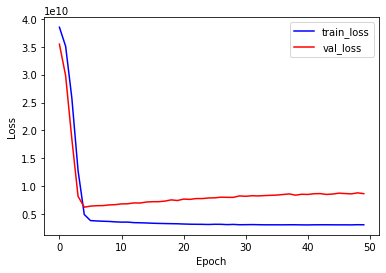

In [743]:
	plt.plot(range(len(train_losses)), train_losses, color = "blue", label = "train_loss")
	plt.plot(range(len(val_losses)), val_losses, color = "red", label = "val_loss")
	plt.legend()
	plt.xlabel("Epoch")
	plt.ylabel("Loss")

Text(0, 0.5, 'acc')

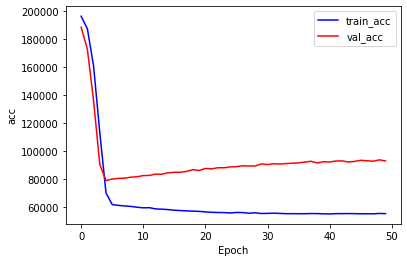

In [744]:
	plt.plot(range(len(rmse_loss)), rmse_loss, color = "blue", label = "train_acc")
	plt.plot(range(len(val_rmse_loss)), val_rmse_loss, color = "red", label = "val_acc")
	plt.legend()
	plt.xlabel("Epoch")
	plt.ylabel("acc")


### ＜MNIST＞

In [689]:
# ハイパーパラメータの設定
learning_rate = 0.0008
batch_size = 200
num_epochs = 50
n_hidden1 = 400
n_hidden2 = 200
n_output = 10
n_input = 784

n_samples = X_train.shape[0]

net = nn.Sequential(
    nn.Linear(n_input, n_hidden1),
    nn.ReLU(),
    nn.Linear(n_hidden1, n_hidden2),
    nn.ReLU(),
    nn.Linear(n_hidden2, n_output),
    nn.Softmax()
)


In [690]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder 
from keras.datasets import mnist

# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# データセットの読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train /255
X_test = X_test /255

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)



'\nprint("y_train.shape = ", y_train.shape)\nprint("y_val.shape = ", y_val.shape)\n\nprint("y_pred_proba", y_pred_proba)\nprint("y_pred", y_pred)\n'

In [691]:
from torch.utils.data import TensorDataset, DataLoader

# NumPyのndarrayをPyTorchのTensorに変換
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32) 

# 訓練用データでDataLoaderを作成
ds_train = TensorDataset(X_train, y_train)
train_loader = DataLoader(ds_train, batch_size=batch_size, shuffle=True)

In [692]:
from torch import optim
from sklearn.metrics import accuracy_score

# ソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()

# Adam
optimizer = optim.Adam(net.parameters())

# 損失関数のログ
losses = []

train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(num_epochs):
    running_loss = 0.0
    train_accuracy = 0
    acc = 0    
    v_acc = 0

    # ネットワークを訓練モードにする
    net.train()
    for i, (xx, yy) in enumerate(train_loader):
        optimizer.zero_grad()        
        y_pred = net(xx)
        #print("y_pred = ", y_pred)

        # y_predはn×3の2次元
        _y_pred = torch.argmax(y_pred, dim = 1)
        
        # ｙは要素数ｎの1次元配列へ
        _yy = torch.flatten(yy, start_dim = 0)
        
        loss = loss_fn(y_pred, _yy)

        loss.backward()
        correct = ((_y_pred == _yy).sum().item() / len(yy))
        acc += correct

        optimizer.step()
        running_loss += loss.item()
        
 
    train_losses.append(running_loss / (i+1))
    train_acc.append(acc / (i+1) )

    
    # ネットワークを評価モードにして
    # 検証データの損失関数を計算する
    net.eval()
    with torch.no_grad():
        y_pred = net(X_val)
        
    # ロス算出するため、ターゲットを1次元化
    _y_val = torch.flatten(y_val, start_dim = 0)
    val_loss = loss_fn(y_pred, _y_val)
    val_losses.append(val_loss.item())

    # y_predはn×3の2次元 ⇒ ｎ×１次元
    _y_pred = torch.argmax(y_pred, dim = 1)
    v_acc = ((_y_pred == _y_val).float().sum().item() / len(y_val))
    val_acc.append(v_acc)
    
    if (epoch + 1)%1 ==0:
        print("Epoch {}, train_losses : {:.4f}, val_losses : {:.4f}, acc : {:.4f}, val_acc : {:.4f}".format(
            epoch + 1, train_losses[-1], val_losses[-1], train_acc[-1], v_acc))

    

Epoch 1, train_losses : 1.6295, val_losses : 1.5396, acc : 0.8621, val_acc : 0.9247
Epoch 2, train_losses : 1.5308, val_losses : 1.5225, acc : 0.9346, val_acc : 0.9413
Epoch 3, train_losses : 1.5151, val_losses : 1.5112, acc : 0.9490, val_acc : 0.9521
Epoch 4, train_losses : 1.5047, val_losses : 1.5040, acc : 0.9589, val_acc : 0.9593
Epoch 5, train_losses : 1.4969, val_losses : 1.4985, acc : 0.9667, val_acc : 0.9651
Epoch 6, train_losses : 1.4919, val_losses : 1.4977, acc : 0.9711, val_acc : 0.9653
Epoch 7, train_losses : 1.4885, val_losses : 1.4965, acc : 0.9743, val_acc : 0.9656
Epoch 8, train_losses : 1.4853, val_losses : 1.4925, acc : 0.9771, val_acc : 0.9689
Epoch 9, train_losses : 1.4830, val_losses : 1.4899, acc : 0.9793, val_acc : 0.9719
Epoch 10, train_losses : 1.4807, val_losses : 1.4897, acc : 0.9815, val_acc : 0.9728
Epoch 11, train_losses : 1.4790, val_losses : 1.4908, acc : 0.9832, val_acc : 0.9706
Epoch 12, train_losses : 1.4771, val_losses : 1.4903, acc : 0.9850, val_ac

Text(0, 0.5, 'Loss')

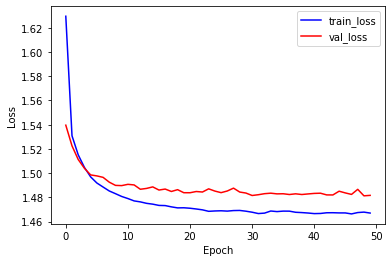

In [693]:
	plt.plot(range(len(train_losses)), train_losses, color = "blue", label = "train_loss")
	plt.plot(range(len(val_losses)), val_losses, color = "red", label = "val_loss")
	plt.legend()
	plt.xlabel("Epoch")
	plt.ylabel("Loss")

Text(0, 0.5, 'acc')

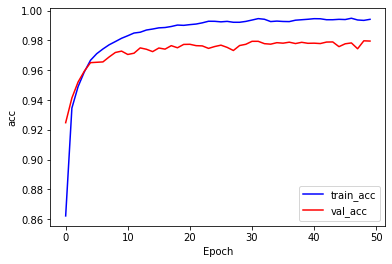

In [694]:
	plt.plot(range(len(train_acc)), train_acc, color = "blue", label = "train_acc")
	plt.plot(range(len(val_acc)), val_acc, color = "red", label = "val_acc")
	plt.legend()
	plt.xlabel("Epoch")
	plt.ylabel("acc")